In [ ]:
import pandas as pd

# 读取CSV文件
file_path = 'your_file.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path)

# 提取与LYMPHOMA相关的数据
lymphoma_data = data[data['diagnosis'] == 'LYMPHOMA']

# 获取诊断个数和study_location的ID
lymphoma_count = len(lymphoma_data)
lymphoma_ids = lymphoma_data['study_location'].str.extract(r'(PETCT_[\w\d]+)')[0].tolist()

# 输出结果
print(f"淋巴瘤（LYMPHOMA）诊断个数: {lymphoma_count}")

import os
import shutil

# 定义源文件夹和目标文件夹
source_dir = r"D:\BaiduNetdiskDownload\Download\CT_PET\FDG-PET-CT-Lesions"
target_dir = r"C:\Users\views\PycharmProjects\TCIA_Lymphoma_data"

# 确保目标文件夹存在
os.makedirs(target_dir, exist_ok=True)

# 遍历源文件夹
for root, dirs, files in os.walk(source_dir):
    for folder in dirs:
        if folder in lymphoma_ids:  # 如果文件夹名在ID列表中
            src_path = os.path.join(root, folder)
            dest_path = os.path.join(target_dir, folder)
            try:
                shutil.copytree(src_path, dest_path)  # 复制整个文件夹
                print(f"成功复制: {folder}")
            except Exception as e:
                print(f"复制失败: {folder}, 错误信息: {e}")

print("所有文件夹复制完成！")


### Data description
 #### column 1: study_location <./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/>
 ##### PETCT_0011f3deaf
 #### column 2: diagnosis<MELANOMA, LUNG_CANCER, NEGATIVE,LYMPHOMA>
 #### column 3: age<063Y>
 #### column 4: sex<F, M>
 #### repeated: PETCT_15f4b7254f

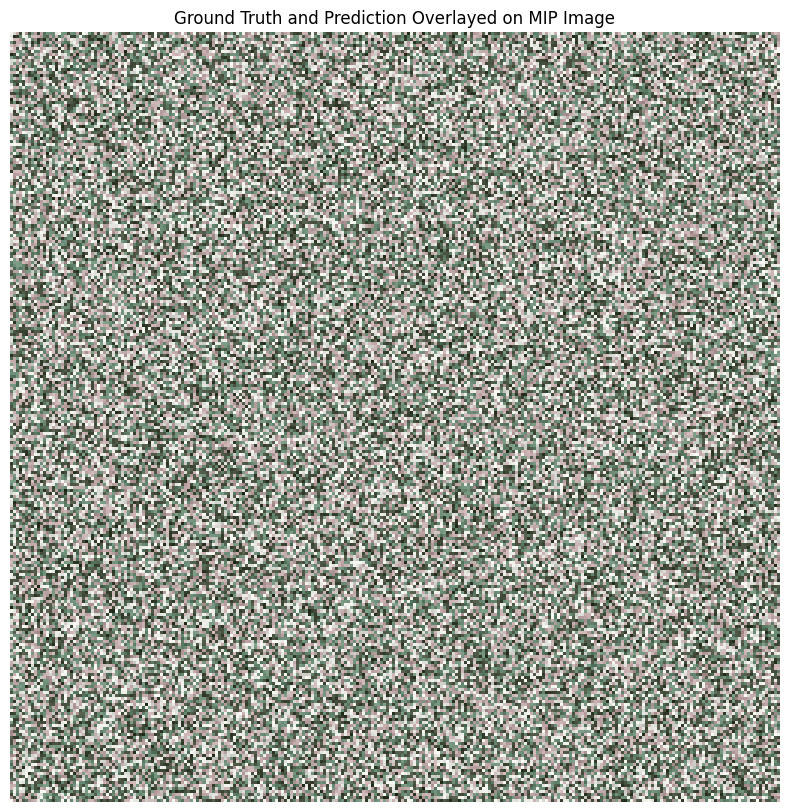

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 假设你已经加载了CT图像、PET图像和mask
ct_image = np.random.rand(311, 256, 256)  # 示例CT图像
pet_image = np.random.rand(311, 256, 256)  # 示例PET图像
mask = np.random.randint(0, 2, (311, 256, 256))  # 示例mask
prediction = np.random.randint(0, 2, (311, 256, 256))  # 示例mask

# 计算全身图像的最大强度投影（MIP）
mip_image = np.max(np.stack([ct_image, pet_image], axis=-1), axis=-1)

# 创建一个颜色映射
cmap = ListedColormap(['gray', 'red', 'green'])

# 设置图表的显示
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 选择一个切片（比如中间切片）
slice_index = ct_image.shape[0] // 2  # 假设选择中间切片

# 显示MIP图像
ax.imshow(mip_image[slice_index], cmap='gray', interpolation='none')

# 在图像上叠加真值掩膜和预测掩膜
ax.imshow(mask[slice_index], cmap='Reds', alpha=0.5)  # 红色用于真值掩膜
ax.imshow(prediction[slice_index], cmap='Greens', alpha=0.5)  # 绿色用于预测掩膜

# 添加标题和标签
ax.set_title('Ground Truth and Prediction Overlayed on MIP Image')
ax.axis('off')  # 关闭坐标轴显示

plt.show()
